In [1]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
def min_max_normalization(x,lst,i): #검정색일 수록 높은 숫자이도록
    return 255 - int(( (x-min(lst[i]))/(max(lst[i]) - min(lst[i])) )*255)


#def function_name(var_name: var_type) -> return_type:
''' csv 파일을 넣으면 당일날 포함 과거 7개의 데이터를 layered한 데이터를 return 해준다
단, 첫번째에서 6번째까지는 과거의 기록이 없기에 그냥 같은 층으로 연장시켜 준다 (17, 14) 사이즈로'''
'''So please unpacking this function in two img and label'''
def make_layered_img(correct_file_name : str) -> list: #return이 list두개임
    row_data_frame = pd.read_csv("/content/gdrive/My Drive/data_ton/"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
    #row_data_frame = pd.read_csv("./"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
    row_data_frame.columns = ['label',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] #string -> int
    #Normalization 해주고 255 픽셀화를 해주자
    data_set = []
    for idx in row_data_frame.index:
        data_set.append([])
        for time in row_data_frame.columns[1:]: #아래 방향으로 뽑아냄    
            data_set[idx].append(row_data_frame[time][idx])
    
    for lst_num in range (0,len(data_set)):
        #print(lst_num)<- error가 날때 검사용 
        data_set[lst_num] = list(map(lambda x: min_max_normalization(x,data_set,lst_num), data_set[lst_num])) 
    
    #에러 방지 코드
    if len(row_data_frame["label"]) != len(data_set):
        print('The make_layer_img has errors So, return [""],[""] ')
        return [], []
    else:
        print(" The make_layer_img function Successfully already, now make img \n")        
        print(len(data_set))
    # layered img를 만들어주자
    img_lst = []
    label_lst = []
    for data_idx in range (0, len(data_set)):
        #print(data_idx)
        tmp_img = [] #방을 만들어주기
        
        #먼저 예외 처리 (과거의 데이터가 5개가 되지 않을 경우)
        if data_idx < 6: # 0~ 5 -> 최대 개수 5일때 6개
            for _ in range (0,14):
                tmp_img.append(data_set[data_idx])
            
        else:
            #이 부분에서 데이터가 한개가 빠짐
            if data_idx == len(data_set)-1: #마지막놈은 다음 놈의 label이없으니깐
                                          #<- 애초에 이미지 데이터를 만들지 않겠다
                print("The length of img : ", len(img_lst), "The length of label label", len(label_lst))
                print("Success for makinng img and label \nSo please unpacking with img,label")
                return np.array(img_lst),np.array(label_lst) # 함수가 끝나는 지점 
                    
            for di in range (data_idx-6,data_idx+1): # data_idx -6 ~ data_idx 까지
                #같은 레이어 두개씩 쌓기
                tmp_img.append(data_set[di])
                tmp_img.append(data_set[di]) 
                 
                
        label_lst.append(row_data_frame["label"][data_idx+1]) #다음녀석의 label을 idx로 사용
        img_lst.append(np.array(tmp_img))
        
    return print("Something is Wrong with make_layered img") #위에 if문에 걸리지 않았음

In [4]:
def make_14_layered_img(correct_file_name : str) -> list: #return이 list두개임
    row_data_frame = pd.read_csv("/content/gdrive/My Drive/data_ton/"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
    #row_data_frame = pd.read_csv("./"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
    row_data_frame.columns = ['label',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] #string -> int
    #Normalization 해주고 255 픽셀화를 해주자
    data_set = []
    for idx in row_data_frame.index:
        data_set.append([])
        for time in row_data_frame.columns[1:]: #아래 방향으로 뽑아냄    
            data_set[idx].append(row_data_frame[time][idx])
    
    for lst_num in range (0,len(data_set)):
        #print(lst_num)<- error가 날때 검사용 
        data_set[lst_num] = list(map(lambda x: min_max_normalization(x,data_set,lst_num), data_set[lst_num])) 
    
    #에러 방지 코드
    if len(row_data_frame["label"]) != len(data_set):
        print('The make_layer_img has errors So, return [""],[""] ')
        return [], []
    else:
        print(" The make_layer_img function Successfully already, now make img \n")        
        print(len(data_set))
    # layered img를 만들어주자
    img_lst = []
    label_lst = []
    for data_idx in range (0, len(data_set)):
        #print(data_idx)
        tmp_img = [] #방을 만들어주기
        
        #먼저 예외 처리 (과거의 데이터가 7개가 되지 않을 경우)
        if data_idx < 13: # 0~ 12 -> 최대 개수 12일때 13개
            #for _ in range (0,14):
                #tmp_img.append(data_set[data_idx])
            continue
        else:
            #이 부분에서 데이터가 한개가 빠짐
            if data_idx == len(data_set)-1: #마지막놈은 다음 놈의 label이없으니깐
                                          #<- 애초에 이미지 데이터를 만들지 않겠다
                print("The length of img : ", len(img_lst), "The length of label label", len(label_lst))
                print("Success for makinng img and label \nSo please unpacking with img,label")
                return np.array(img_lst),np.array(label_lst) # 함수가 끝나는 지점 
                    
            for di in range (data_idx-13,data_idx+1): # data_idx -13 ~ data_idx 까지
                
                tmp_img.append(data_set[di])
                #tmp_img.append(data_set[di]) 
                 
                
        label_lst.append(row_data_frame["label"][data_idx+1]) #다음녀석의 label을 idx로 사용
        img_lst.append(np.array(tmp_img))
        
    return print("Something is Wrong with make_layered img") #위에 if문에 걸리지 않았음

In [26]:
def make_img(correct_file_name : str) -> list: #return이 list두개임
    row_data_frame = pd.read_csv("/content/gdrive/My Drive/data_ton/"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
    #row_data_frame = pd.read_csv("./"+correct_file_name+".csv", encoding = 'cp949',low_memory=False)
    row_data_frame.columns = ['label',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] #string -> int
    #Normalization 해주고 255 픽셀화를 해주자
    data_set = []
    for idx in row_data_frame.index:
        data_set.append([])
        for time in row_data_frame.columns[1:]: #아래 방향으로 뽑아냄    
            data_set[idx].append(row_data_frame[time][idx])
    
    for lst_num in range (0,len(data_set)):
        #print(lst_num)<- error가 날때 검사용 
        data_set[lst_num] = list(map(lambda x: min_max_normalization(x,data_set,lst_num), data_set[lst_num])) 
    
    #에러 방지 코드
    if len(row_data_frame["label"]) != len(data_set):
        print('The make_layer_img has errors So, return [""],[""] ')
        return [], []
    else:
        print(" The make_layer_img function Successfully already, now make img \n")        
        print(len(data_set))
    #img를 만들어주자
    img_lst = []
    label_lst = []
    for data_idx in range (0, len(data_set)):
        #print(data_idx)
        tmp_img = [] #방을 만들어주기

        if data_idx == len(data_set)-1: #마지막놈은 다음 놈의 label이없으니깐
                                          #<- 애초에 이미지 데이터를 만들지 않겠다
            print("The length of img : ", len(img_lst), "The length of label label", len(label_lst))
            print("Success for makinng img and label \nSo please unpacking with img,label")
            return np.array(img_lst),np.array(label_lst) # 함수가 끝나는 지점 
                    
        for _ in range (0,14): # data_idx -13 ~ data_idx 까지
                
            tmp_img.append(data_set[data_idx])
                #tmp_img.append(data_set[di]) 
                 
        label_lst.append(row_data_frame["label"][data_idx+1]) #다음녀석의 label을 idx로 사용
        img_lst.append(np.array(tmp_img))

    return print("Something is Wrong with make_layered img") #위에 if문에 걸리지 않았음

In [27]:
img_set14,label_set14 = make_14_layered_img("correct_data")
img_set7,label_set7 = make_layered_img("correct_data")
img_set,label_set = make_img("correct_data")
real_label_name, count = np.unique(label_set14,return_counts = True) #진짜 label명을 따로 저장하기 [0~13]으로 이름 다시 매길거여서

 The make_layer_img function Successfully already, now make img 

1782
The length of img :  1768 The length of label label 1768
Success for makinng img and label 
So please unpacking with img,label
 The make_layer_img function Successfully already, now make img 

1782
The length of img :  1781 The length of label label 1781
Success for makinng img and label 
So please unpacking with img,label
 The make_layer_img function Successfully already, now make img 

1782
The length of img :  1781 The length of label label 1781
Success for makinng img and label 
So please unpacking with img,label


In [29]:
label_set[0]

15

# 13~  16 데이터 정제

In [30]:
new_img_set = []
new_label_set = []
for idx in range (0, len(img_set14)):
    if label_set14[idx] <=16 and label_set14[idx] >=13:
        new_img_set.append(img_set14[idx])
        new_label_set.append(label_set14[idx])

for idx in range (0, len(img_set7)):
    if label_set7[idx] <=16 and label_set7[idx] >=13:
        new_img_set.append(img_set7[idx])
        new_label_set.append(label_set7[idx])

for idx in range (0, len(img_set)):
    if label_set[idx] <=16 and label_set[idx] >=13:
        new_img_set.append(img_set[idx])
        new_label_set.append(label_set[idx])

In [31]:
new_img_set = np.array(new_img_set)
new_label_set = np.array(new_label_set)
len(new_img_set), len(new_label_set)

(5084, 5084)

# 모델을 위해 데이터를 가공시키기 X-> 픽셀화 Y-> 카테고리화

In [32]:
#X를 픽셀화 시켜주기
print("\n------------------------------ X Pixelization (",len(img_set),",14,17,1) ------------------------------\n")
X_set = new_img_set.reshape(len(new_img_set),14,17,1)
print(X_set[6][:3])

#Y를 categorical 
print("\n---------------------------------- Y Categorical ----------------------------------\n")
model_label_set = []
for i in range (0,len(new_label_set)):
    model_label_set.append(new_label_set[i]-13)
#a, count = np.unique(model_label_set,return_counts = True)
b, count2 = np.unique(new_label_set,return_counts = True)


print("Before Categorical : ",model_label_set[0])
from tensorflow.keras.utils import to_categorical
Y_set = to_categorical(model_label_set, 4)
print("After Categorical : ", Y_set[0])
print("Real_time_set     : ",b)
#print("model_label_set  : ",a)


------------------------------ X Pixelization ( 1781 ,14,17,1) ------------------------------

[[[255]
  [250]
  [236]
  [204]
  [123]
  [118]
  [ 28]
  [ 44]
  [ 51]
  [  0]
  [ 32]
  [111]
  [136]
  [141]
  [198]
  [213]
  [235]]

 [[255]
  [251]
  [239]
  [214]
  [146]
  [141]
  [ 49]
  [ 37]
  [ 66]
  [  0]
  [ 48]
  [124]
  [137]
  [151]
  [200]
  [214]
  [232]]

 [[255]
  [252]
  [237]
  [208]
  [127]
  [118]
  [ 44]
  [ 23]
  [ 19]
  [  0]
  [ 24]
  [107]
  [124]
  [144]
  [194]
  [211]
  [235]]]

---------------------------------- Y Categorical ----------------------------------

Before Categorical :  2
After Categorical :  [0. 0. 1. 0.]
Real_time_set     :  [13 14 15 16]


# 데이터 검증

In [33]:
#실제 그림에서 찾고 싶으면 x축에 6을 더하고 (6~22 -> 0~16) 7을 빼주면(8~20 -> 1~13) 된다, 즉 x에서 -1을 해주면 label이 나온다
print(Y_set[10])
#plt.imshow(X_set[10])#,cmap= "gray")

#즉 이 경우 9 이므로 다음 놈이 10에서 가장 찐할 것이다 이 그림의 맨 밑이랑 상관 x

[0. 0. 0. 1.]


[0. 0. 0. 1.]


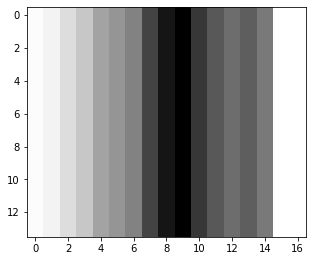

In [37]:
#실제 그림에서 찾고 싶으면 x축에 6을 더하고 (6~22 -> 0~16) 7을 빼주면(8~20 -> 1~13) 된다, 즉 x에서 -1을 해주면 label이 나온다
print(Y_set[10])
plt.figure(figsize = (5,5))
plt.imshow(X_set[5000].reshape(14,17),cmap= "gray")
#즉 이 경우 9 이므로 다음 놈이 10에서 가장 찐할 것이다 이 그림의 맨 밑이랑 상관 x

[0. 0. 0. 1.]


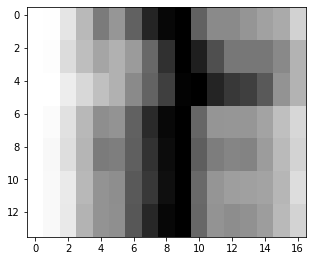

In [38]:
#실제 그림에서 찾고 싶으면 x축에 6을 더하고 (6~22 -> 0~16) 7을 빼주면(8~20 -> 1~13) 된다, 즉 x에서 -1을 해주면 label이 나온다
print(Y_set[10])
plt.figure(figsize = (5,5))
plt.imshow(X_set[2000].reshape(14,17),cmap= "gray")
#즉 이 경우 9 이므로 다음 놈이 10에서 가장 찐할 것이다 이 그림의 맨 밑이랑 상관 x

[0. 0. 0. 1.]


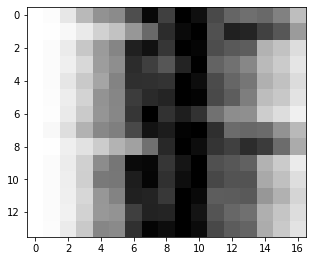

In [40]:
#실제 그림에서 찾고 싶으면 x축에 6을 더하고 (6~22 -> 0~16) 7을 빼주면(8~20 -> 1~13) 된다, 즉 x에서 -1을 해주면 label이 나온다
print(Y_set[10])
plt.figure(figsize = (5,5))
plt.imshow(X_set[10].reshape(14,17),cmap= "gray")
#즉 이 경우 9 이므로 다음 놈이 10에서 가장 찐할 것이다 이 그림의 맨 밑이랑 상관 x

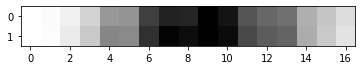

In [15]:
plt.imshow(X_set[11][11:13].reshape(2,17), cmap= "gray")

In [16]:
X_set[11][13] 

array([[255],
       [252],
       [234],
       [198],
       [143],
       [117],
       [ 77],
       [ 39],
       [ 45],
       [ 12],
       [  0],
       [ 55],
       [100],
       [ 95],
       [103],
       [142],
       [198]])

In [17]:
Y_set[0]

array([0., 0., 1., 0.], dtype=float32)

# Train과 Test set 나누기

In [41]:
from sklearn.model_selection import train_test_split
if (len(X_set) == len(Y_set)): #나누기전에 확인하는 조건 
    
    ######################
    PER_TRAIN = 0.8 #Train 과 Test 8:2 로 나누겠다는 소리
    ######################
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size=0.2, random_state=42)
    #X_train, Y_train = X_set[:int(len(X_set)*PER_TRAIN)], Y_set[:int(len(X_set)*PER_TRAIN)]
    #X_test, Y_test = X_set[int(len(X_set)*PER_TRAIN):], Y_set[int(len(X_set)*PER_TRAIN):]
    print(len(X_train),len(Y_train),len(X_test),len(Y_test))

4067 4067 1017 1017


In [42]:
print(X_train.shape)
print(Y_train.shape)

(4067, 14, 17, 1)
(4067, 4)


# DropOut적용

In [ ]:
#Convolution - Batch Normalization - Activation - Dropout - Pooling

In [ ]:
# 16 32 32
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_14 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_15 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_4 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_16 (Bat  (None, 14, 17, 32)      

Epoch 1/100
17/17 [==============================] - 5s 229ms/step - loss: 3.2527 - accuracy: 0.4063 - val_loss: 12.2447 - val_accuracy: 0.2259
Epoch 2/100
17/17 [==============================] - 4s 217ms/step - loss: 1.2830 - accuracy: 0.5315 - val_loss: 5.9780 - val_accuracy: 0.1667
Epoch 3/100
17/17 [==============================] - 4s 215ms/step - loss: 1.0843 - accuracy: 0.5640 - val_loss: 1.1715 - val_accuracy: 0.5926
Epoch 4/100
17/17 [==============================] - 4s 212ms/step - loss: 1.0046 - accuracy: 0.5677 - val_loss: 1.0267 - val_accuracy: 0.6000
Epoch 5/100
17/17 [==============================] - 4s 217ms/step - loss: 0.9991 - accuracy: 0.5696 - val_loss: 1.0162 - val_accuracy: 0.6000
Epoch 6/100
17/17 [==============================] - 4s 213ms/step - loss: 0.9492 - accuracy: 0.5946 - val_loss: 1.0172 - val_accuracy: 0.6148
Epoch 7/100
17/17 [==============================] - 4s 218ms/step - loss: 0.9712 - accuracy: 0.5788 - val_loss: 0.9906 - val_accuracy: 0.614

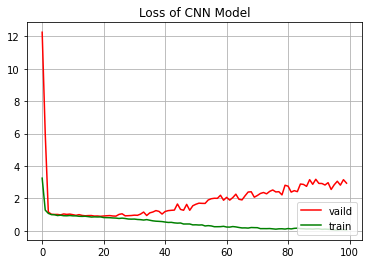

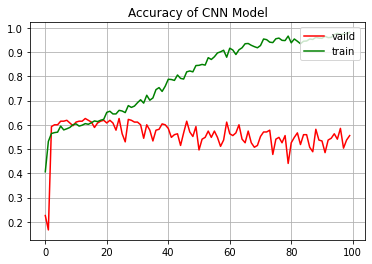

In [ ]:
#전체 1424 개
classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [ ]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)
print('테스트 loss :', test_loss)

11/11 - 0s - loss: 3.2832 - accuracy: 0.5178 - 293ms/epoch - 27ms/step
테스트 정확도: 0.5177514553070068
테스트 loss : 3.283198356628418


In [ ]:
# 16 32 32
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_17 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_18 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_5 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_19 (Bat  (None, 14, 17, 32)      

Epoch 1/40
17/17 [==============================] - 7s 349ms/step - loss: 2.9318 - accuracy: 0.4063 - val_loss: 35.8044 - val_accuracy: 0.1667
Epoch 2/40
17/17 [==============================] - 4s 222ms/step - loss: 1.2364 - accuracy: 0.5232 - val_loss: 12.0342 - val_accuracy: 0.1704
Epoch 3/40
17/17 [==============================] - 4s 223ms/step - loss: 1.1017 - accuracy: 0.5306 - val_loss: 2.3571 - val_accuracy: 0.5259
Epoch 4/40
17/17 [==============================] - 4s 223ms/step - loss: 1.0392 - accuracy: 0.5659 - val_loss: 1.8137 - val_accuracy: 0.5815
Epoch 5/40
17/17 [==============================] - 4s 228ms/step - loss: 1.0172 - accuracy: 0.5575 - val_loss: 1.6949 - val_accuracy: 0.5815
Epoch 6/40
17/17 [==============================] - 4s 228ms/step - loss: 1.0008 - accuracy: 0.5714 - val_loss: 1.1208 - val_accuracy: 0.5926
Epoch 7/40
17/17 [==============================] - 4s 219ms/step - loss: 0.9805 - accuracy: 0.5900 - val_loss: 1.0902 - val_accuracy: 0.5889
Epoc

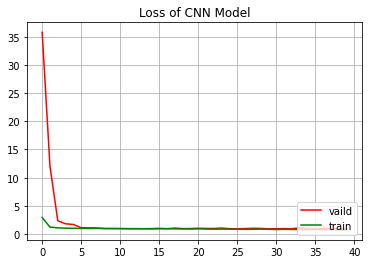

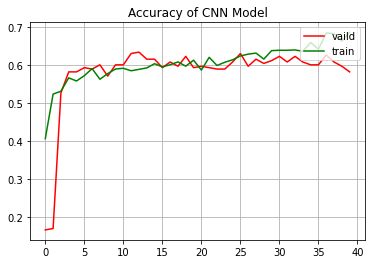

In [ ]:
#전체 1424 개
classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/') #기본적으로 필요한 위치입니다. 

# 아이디를 등록하면 코드를 부여하는데 복사해서 아래 생기는 칸에 붙여넣고 확인을 넣어줍니다.

!pwd 
%cd gdrive/'My Drive'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content
/content/gdrive/My Drive


In [ ]:
from keras.models import load_model
model.save('my_model2.h5')

In [ ]:
model.save_weights("test_save_weight")

In [ ]:
import pandas as pd
hist_df = pd.DataFrame(classifier.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# 모델 그대로 적용

In [43]:
# 16 32 32
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 14, 17, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_7 (Batc  (None, 14, 17, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 17, 32)        12832     
                                                                 
 dropout_2 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 14, 17, 32)      

Epoch 1/40
51/51 [==============================] - 12s 210ms/step - loss: 1.9990 - accuracy: 0.4749 - val_loss: 1.9987 - val_accuracy: 0.1597
Epoch 2/40
51/51 [==============================] - 10s 190ms/step - loss: 1.0393 - accuracy: 0.5662 - val_loss: 1.0845 - val_accuracy: 0.5627
Epoch 3/40
51/51 [==============================] - 10s 190ms/step - loss: 1.0321 - accuracy: 0.5792 - val_loss: 1.0488 - val_accuracy: 0.6007
Epoch 4/40
51/51 [==============================] - 10s 191ms/step - loss: 1.0072 - accuracy: 0.5742 - val_loss: 0.9723 - val_accuracy: 0.5946
Epoch 5/40
51/51 [==============================] - 10s 190ms/step - loss: 0.9934 - accuracy: 0.5795 - val_loss: 1.0087 - val_accuracy: 0.5688
Epoch 6/40
51/51 [==============================] - 10s 190ms/step - loss: 1.0036 - accuracy: 0.5650 - val_loss: 0.9633 - val_accuracy: 0.5848
Epoch 7/40
51/51 [==============================] - 11s 214ms/step - loss: 0.9679 - accuracy: 0.5779 - val_loss: 1.0103 - val_accuracy: 0.6069

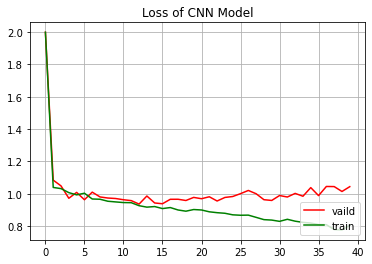

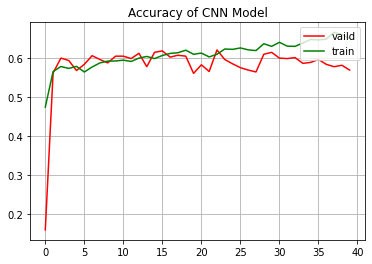

In [44]:
#전체 1424 개
classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [22]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

22/22 - 0s - loss: 1.1694 - accuracy: 0.5805 - 495ms/epoch - 22ms/step
테스트 정확도: 0.5805022120475769


# 좀더 간단한 모델

In [23]:
# 16 32 32
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 14, 17, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_4 (Batc  (None, 14, 17, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 17, 32)        12832     
                                                                 
 dropout_1 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 14, 17, 32)      

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Batc  (None, 14, 17, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_10 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_3 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 14, 17, 32)      

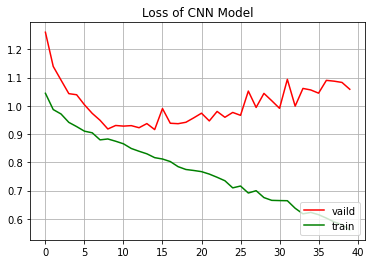

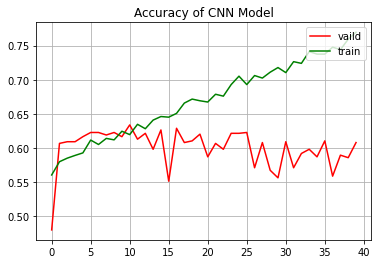

In [45]:
# 16 32 32
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [25]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

22/22 - 0s - loss: 1.0379 - accuracy: 0.5864 - 476ms/epoch - 22ms/step
테스트 정확도: 0.586410641670227


#Learning rate를 늘려봄

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_13 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_4 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_14 (Bat  (None, 14, 17, 32)      

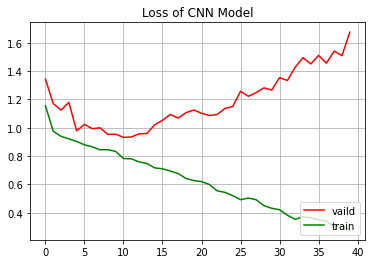

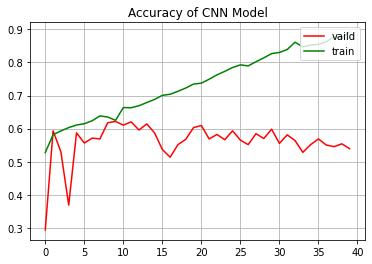

In [46]:
# 16 32 32
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=(5, 5), padding="same", activation='relu'))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [47]:
#전체 1424 개
classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

Epoch 1/40
51/51 [==============================] - 29s 560ms/step - loss: 0.2536 - accuracy: 0.8998 - val_loss: 1.5490 - val_accuracy: 0.5676
Epoch 2/40
51/51 [==============================] - 28s 559ms/step - loss: 0.2456 - accuracy: 0.9099 - val_loss: 1.6244 - val_accuracy: 0.5590
Epoch 3/40
51/51 [==============================] - 29s 562ms/step - loss: 0.2337 - accuracy: 0.9118 - val_loss: 1.5899 - val_accuracy: 0.5467
Epoch 4/40
36/51 [====================>.........] - ETA: 7s - loss: 0.2226 - accuracy: 0.9180

KeyboardInterrupt: ignored

# 위에 보다 간단한걸로 돌려보기 16 32 64 64

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_16 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_17 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_5 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_18 (Bat  (None, 14, 17, 32)      

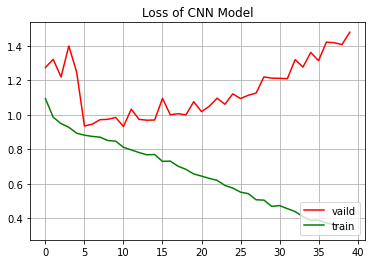

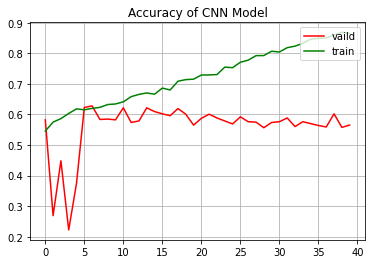

In [48]:
# 16 32 64 64 
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [48]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

# 16 32 64

In [ ]:

img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [ ]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

# 뇌피셜 제일 비슷한거 16 32 32

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_20 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_21 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_6 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 batch_normalization_22 (Bat  (None, 14, 17, 32)      

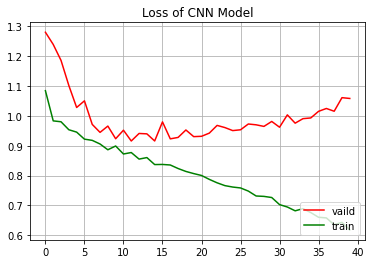

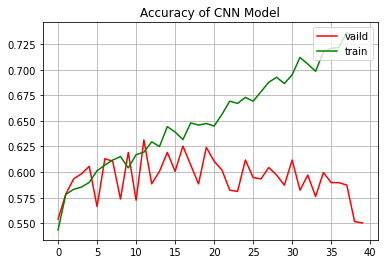

In [49]:

img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [ ]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

# 16 64

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_23 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_24 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 17, 64)        25664     
                                                                 
 dropout_7 (Dropout)         (None, 14, 17, 64)        0         
                                                                 
 average_pooling2d_7 (Averag  (None, 2, 3, 64)        

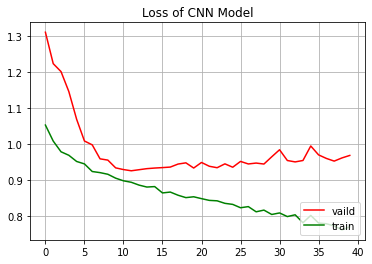

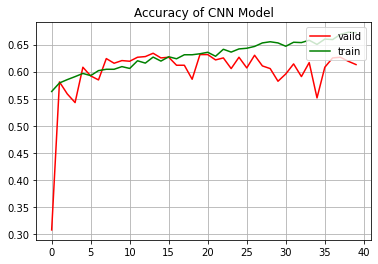

In [50]:

img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [51]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 0.9960 - accuracy: 0.6146 - 362ms/epoch - 11ms/step
테스트 정확도: 0.6145526170730591


# 16 32

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_25 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_26 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_8 (Dropout)         (None, 14, 17, 32)        0         
                                                                 
 average_pooling2d_8 (Averag  (None, 2, 3, 32)        

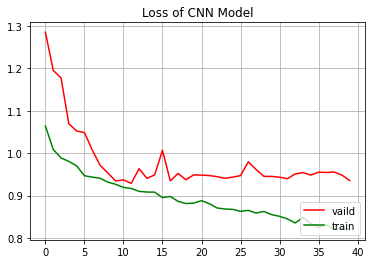

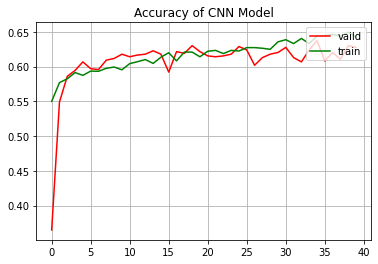

In [52]:

img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [53]:

# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 0.9430 - accuracy: 0.6155 - 279ms/epoch - 9ms/step
테스트 정확도: 0.6155359148979187


# 16 64  vs 16 32

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_27 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_28 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 17, 64)        25664     
                                                                 
 dropout_9 (Dropout)         (None, 14, 17, 64)        0         
                                                                 
 average_pooling2d_9 (Averag  (None, 2, 3, 64)        

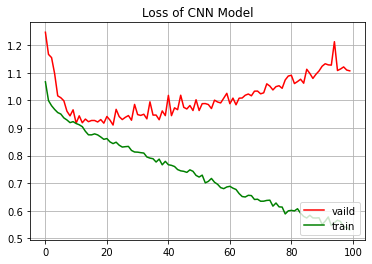

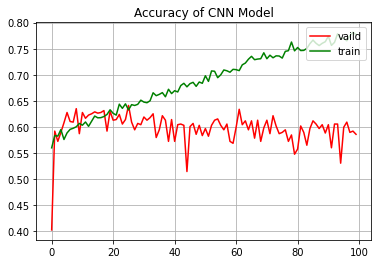

In [54]:
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [55]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 1.1710 - accuracy: 0.5615 - 380ms/epoch - 12ms/step
테스트 정확도: 0.561455249786377


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_29 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 batch_normalization_30 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_10 (Dropout)        (None, 14, 17, 32)        0         
                                                                 
 average_pooling2d_10 (Avera  (None, 2, 3, 32)       

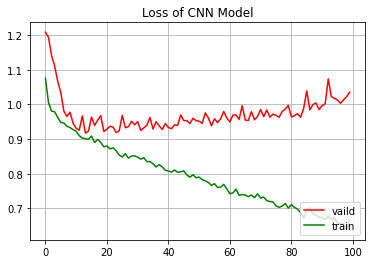

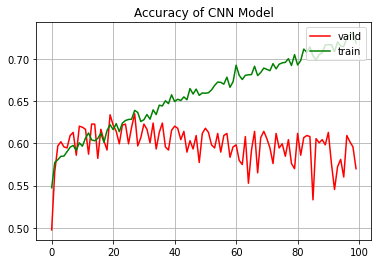

In [56]:
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.3))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [57]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 1.0636 - accuracy: 0.5821 - 296ms/epoch - 9ms/step
테스트 정확도: 0.5821042060852051


## DropOut 0.3 -> 0.5 x 2

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_31 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 dropout_11 (Dropout)        (None, 14, 17, 16)        0         
                                                                 
 batch_normalization_32 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 17, 64)        25664     
                                                                 
 dropout_12 (Dropout)        (None, 14, 17, 64)      

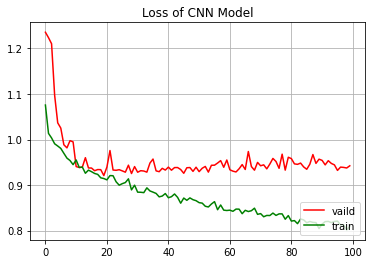

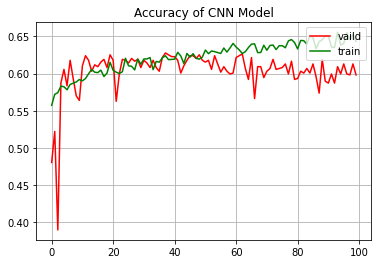

In [58]:
# 16 64
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [59]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 0.9486 - accuracy: 0.6057 - 375ms/epoch - 12ms/step
테스트 정확도: 0.6057030558586121


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_33 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 dropout_13 (Dropout)        (None, 14, 17, 16)        0         
                                                                 
 batch_normalization_34 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_14 (Dropout)        (None, 14, 17, 32)      

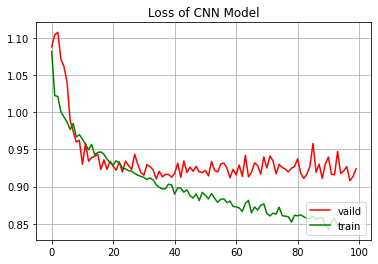

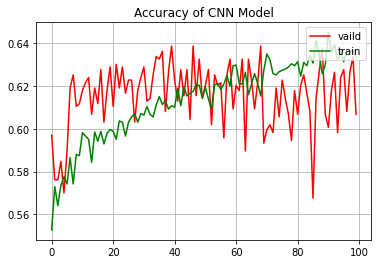

In [60]:
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [61]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 0.9435 - accuracy: 0.6146 - 257ms/epoch - 8ms/step
테스트 정확도: 0.6145526170730591


### learning rate 를 감소

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_37 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 dropout_17 (Dropout)        (None, 14, 17, 16)        0         
                                                                 
 batch_normalization_38 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 17, 64)        25664     
                                                                 
 dropout_18 (Dropout)        (None, 14, 17, 64)      

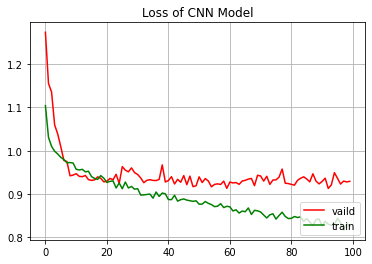

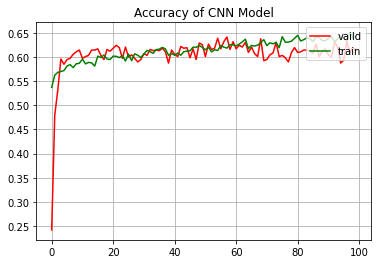

In [63]:
# 16 64
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00065)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [64]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 0.9607 - accuracy: 0.5978 - 381ms/epoch - 12ms/step
테스트 정확도: 0.5978367924690247


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_39 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 dropout_19 (Dropout)        (None, 14, 17, 16)        0         
                                                                 
 batch_normalization_40 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_40 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_20 (Dropout)        (None, 14, 17, 32)      

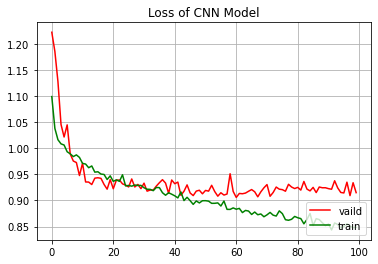

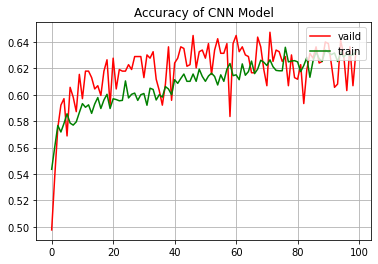

In [65]:
# 16 64
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00065)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

In [66]:
# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 0s - loss: 0.9320 - accuracy: 0.6067 - 290ms/epoch - 9ms/step
테스트 정확도: 0.6066863536834717


#Dense 전 dropout

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_47 (Bat  (None, 14, 17, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 17, 16)        416       
                                                                 
 dropout_27 (Dropout)        (None, 14, 17, 16)        0         
                                                                 
 batch_normalization_48 (Bat  (None, 14, 17, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 17, 32)        12832     
                                                                 
 dropout_28 (Dropout)        (None, 14, 17, 32)      

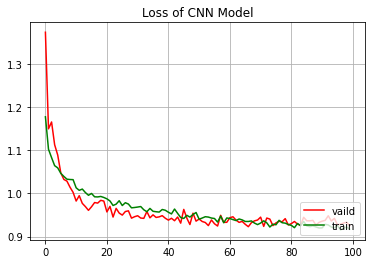

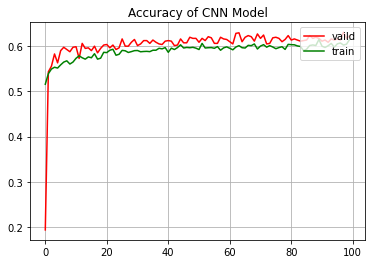

In [71]:
# 16 64
img_height = 14
img_width = 17
model = Sequential()

model.add(layers.BatchNormalization(input_shape=(img_height, img_width , 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.Dropout(0.5))


model.add(AveragePooling2D(pool_size=(5, 5)))
model.add(Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00065)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

classifier = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)


plt.figure()
plt.plot(classifier.history['val_loss'], 'r')
plt.plot(classifier.history['loss'], 'g')
plt.grid()
plt.title('Loss of CNN Model')
plt.legend(['vaild', 'train'], loc='lower right')

plt.figure()
plt.plot(classifier.history['val_accuracy'], 'r')
plt.plot(classifier.history['accuracy'], 'g')
plt.grid()
plt.title('Accuracy of CNN Model')
plt.legend(['vaild', 'train'], loc='upper right')


# test
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('테스트 정확도:', test_acc)